# <font color="darkblue"> Prática 01: Classificação binária com Redes Neurais </font>

**Objetivos:**


*   Utilizar a API Keras para classificação binária com redes neurais.

**Descrição:**

Com base em informações fornecidadas de 303 pessoas, as quais incluem idade, pressão arterial, nível de colesterol, frequência cardíaca, entre outros, crie uma rede neural para prever as chances de indivíduo ter um um infarto. Implemente as células cujos labels indicadores estão em vermelho.  

# <font color="darkblue"> Solução </font>

### Bibliotecas

In [122]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Pandas: 1.5.3
Numpy: 1.22.4
Sklearn: 1.2.2
Matplotlib: 3.7.1
Keras: 2.12.0


### Leitura das instâncias

In [123]:
data = pd.read_csv("heart.csv")

X = np.array(data.drop(['output'], axis=1))
y = np.array(data['output'])

### Explorando os dados

In [124]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

print(f"Shape: {data.shape}")
data.head()

Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


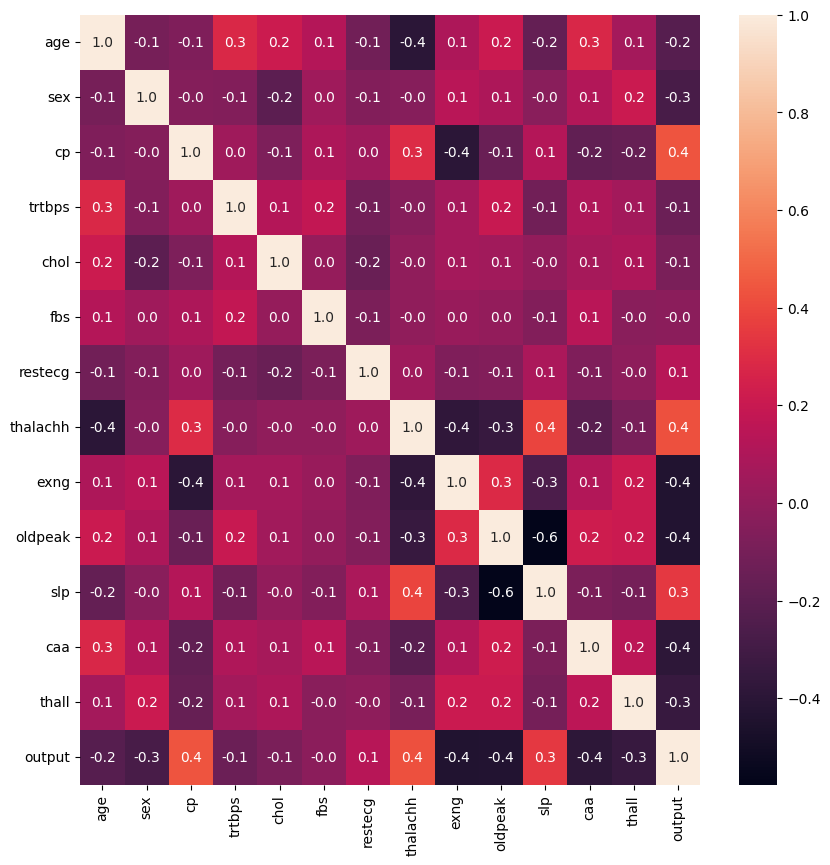

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

### Criando a rede neural

In [138]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=5, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(4, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)
adam = optimizers.Adam(learning_rate=0.01)

# Compila o modelo. O otimizador escolhido foi o Adam com os parâmetros default
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())
print(y_test)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 4)                 56        
                                                                 
 dense_89 (Dense)            (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
[0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0]


### Treinando a rede neural

In [139]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6586 - accuracy: 0.6405
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6405
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6446
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6570
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6488
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6612
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6570
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6405
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6405
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6653
Epoch 11/100
8/8 [===========

### Performance do modelo

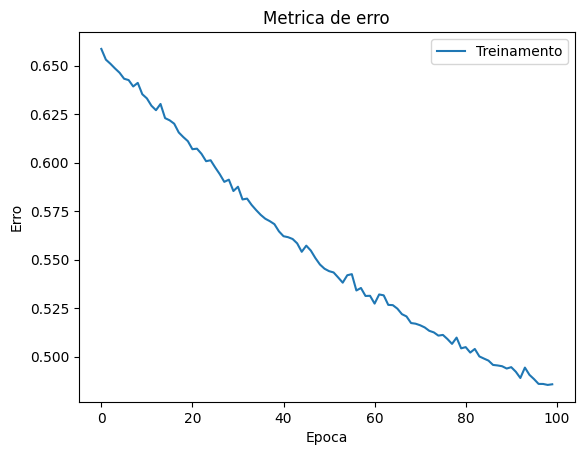

8/8 [==============================] - 0s 2ms/step
--> Acuracia (treino): 0.7603
2/2 [==============================] - 0s 5ms/step
--> Acuracia (teste): 0.8197


In [140]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

<span style="color:red; font-size: 18px; font-weight: bold;">Criando uma rede neural de acordo com a teoria da Dimensão VC</span>

In [129]:
#TODO
# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(4, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)
adam = optimizers.Adam(learning_rate=0.01)

# Compila o modelo. O otimizador escolhido foi o Adam com os parâmetros default
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())
print(y_test)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 4)                 56        
                                                                 
 dense_82 (Dense)            (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
[0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0]


### Usando validação para verificar se há overfitting

In [130]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
8/8 [==============================] - 1s 33ms/step - loss: 0.7262 - accuracy: 0.4421 - val_loss: 0.6977 - val_accuracy: 0.3934
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5413 - val_loss: 0.7086 - val_accuracy: 0.5082
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5537 - val_loss: 0.7062 - val_accuracy: 0.5082
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5537 - val_loss: 0.6991 - val_accuracy: 0.5082
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5537 - val_loss: 0.6958 - val_accuracy: 0.5082
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5537 - val_loss: 0.6957 - val_accuracy: 0.5082
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5537 - val_loss: 0.6984 - val_accuracy: 0.5082
Epoch 8/200
8/8 [=========

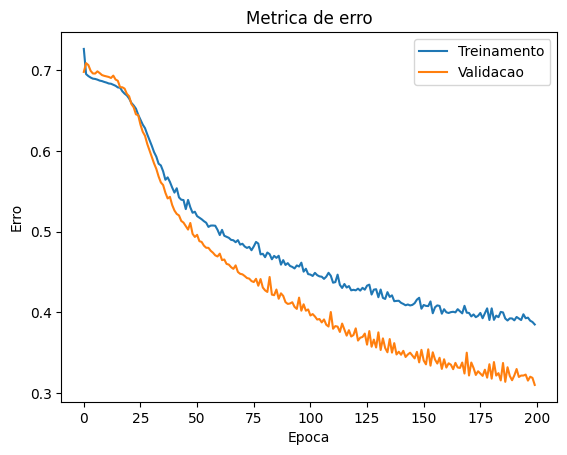

8/8 [==============================] - 0s 2ms/step
--> Acuracia (treino): 0.8264
2/2 [==============================] - 0s 4ms/step
--> Acuracia (teste): 0.9016


In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

<span style="color:red; font-size: 18px; font-weight: bold;">Crie uma rede neural para gerar overfitting</span>

In [132]:
#TODO

### Tratando o overfitting

In [133]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Criando a arquitetura da rede neural
model = Sequential()

# Após o teste anterior, testem a rede neural abaixo, treinando-a com o Early Stopping
model.add(Dense(150, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Treinamento SEM Early Stopping
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32)

# Treinamento COM Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32, callbacks=[es])


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 150)               2100      
                                                                 
 dropout_16 (Dropout)        (None, 150)               0         
                                                                 
 dense_84 (Dense)            (None, 150)               22650     
                                                                 
 dropout_17 (Dropout)        (None, 150)               0         
                                                                 
 dense_85 (Dense)            (None, 1)                 151       
                                                                 
Total params: 24,901
Trainable params: 24,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
8/8 [===========================

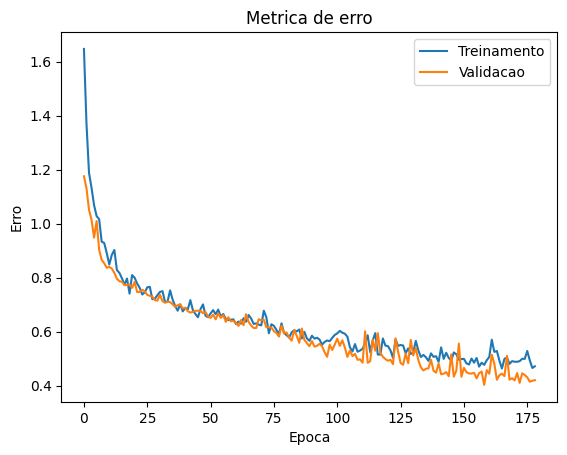

8/8 [==============================] - 0s 2ms/step
--> Acuracia (train): 0.8430
--> Acuracia (test): 0.9180


In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (train): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (test): {accuracy_score(y_test, pred):.4f}')